# Pendulum
## Analytical small angle approximation
We start with the simple pendulum; assuming the small amplitude approximation, and the initial condition that at t=0 the pendulum is at $\theta_0=\pi/3$ and $\dot{\theta}=0$.  Then 
\begin{align}
\theta&=\theta_0\cos{\omega t}\\
\omega&=\sqrt{g/l}\\
\end{align}

# A file we want to include-- pendulumParameters.py

In [1]:
#File pendulumParameters.py

stringDiameter=0.031*0.0254 #meters
stringLength=0.627 #meters, from pivot to top of mass
stringDensity=0.000273/0.738 #kg/m
mMass=0.024245-1.260*stringDensity #kg just the mass (mass+string=24.245 g)
dMass=0.02539 #m diameter of mass, measured with caliper
stringDensity=0.00133/1.31 #kg/m, mass of entire length of string-1.33 g = mass of 1.31 m of string
stringMass=stringDensity*stringLength

#calculate length of pendulum
l=stringLength+dMass/2

#moments of Inertia
IMass=mMass*l*l  #moment of inertia of mass about pivot
IString=1.0/3*stringMass*stringLength**2 #1/3 mL**2 is Moment of intertia of rod about one end
I=IMass+IString

#center of mass
m=mMass+stringMass
lcm=(mMass*l+stringMass*stringLength/2)/m

print('Total Mass ',m)
print('lcm ',lcm,' l ',l)
print('I, IMass, IString:',I, IMass, IString)

Total Mass  0.02441547495810836
lcm  0.6311902802180227  l  0.639695
I, IMass, IString: 0.009813975740162914 0.009730557367544595 8.34183726183206e-05


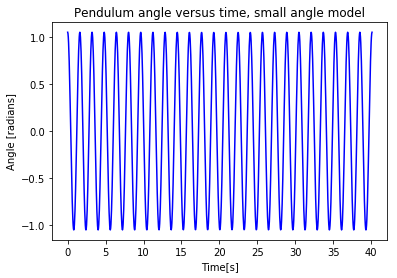

l= 0.639695


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pendulumParameters as pend

theta_0=np.pi/3
#l=0.635 #length of pendulum, meters
l=pend.l
g=9.8 # acceleration of gravity on Earth's surface, meters/s**2
omega=np.sqrt(g/l)
T=2*np.pi/omega  #  period, seconds

nsteps0=1000
t = np.linspace(0.0, 25.0*T, nsteps0)
y0=theta_0*np.cos(omega*t)
figno=1
plt.figure(figno)
figno+=1

plt.plot(t, y0, 'b')
plt.title('Pendulum angle versus time, small angle model')
plt.xlabel('Time[s]')
plt.ylabel('Angle [radians]')
plt.show()

print('l=',l)

## Without the small angle approximation: simple finite difference solution

This is called "Euler integration" in NR, chapter 17.  It is good to read chapter 17 at this point.  
The original equation for the pendulum is:
\begin{equation}
\ddot{\theta}=-\frac{g}{l}\sin{\theta} 
\end{equation}

We write this second order equation as coupled first order equations:
\begin{equation}
\frac{d}{dt}\left(
\begin{array}{c}
\omega\\
\theta\\
\end{array}
\right)=
\left(
\begin{array}{c}
-\frac{g}{l}\sin{\theta}\\
\omega\\
\end{array}\right)
\end{equation}

Expanding the derivatives in terms of $\Delta$ we have
\begin{equation}
\left(
\begin{array}{c}
\frac{\omega(t+\Delta)-\omega(t)}{\Delta}\\
\frac{\theta(t+\Delta)-\theta(t)}{\Delta}\\
\end{array}
\right)=
\left(
\begin{array}{c}
-\frac{g}{l}\sin{\theta}\\
\omega\\
\end{array}\right)
\end{equation}

This ends up giving us a recursion relationship:
\begin{equation}
\left(
\begin{array}{c}
\omega(t+\Delta)\\
\theta(t+\Delta)\\
\end{array}
\right)=
\left(
\begin{array}{c}
-\Delta\frac{g}{l}\sin{\theta(t)}+\omega(t)\\
\Delta\omega(t)+\theta(t)\\
\end{array}\right)
\end{equation}

We write a little Python loop to calculate $\omega$ and $\theta$ using this equation:

Number of steps =100000 and size of steps=0.000401 between 0 and 40.132232 s


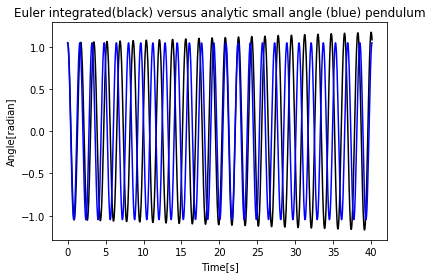

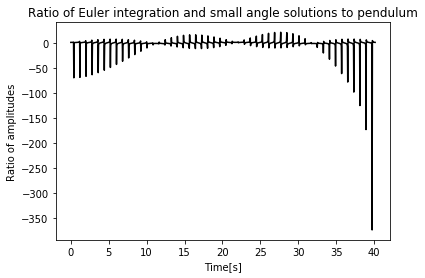

In [7]:
factor=100
nsteps=nsteps0*factor
t2=np.linspace(0,25*T,nsteps)
x=np.zeros(2*len(t2)).reshape(len(t2),2)
Delta=t2[1]
print('Number of steps =%d and size of steps=%f between 0 and %f s'%(len(t2),Delta,25*T))

# we will use the 0-row for theta, and the 1-row for omega
x[0,1]=0  #initial condition is pendulum at rest
x[0,0]=theta_0 #initial condition 
for i in np.arange(0,len(t2)-1):
    x[i+1,1]=-Delta*g/l*np.sin(x[i,0])+x[i,1]
    x[i+1,0]=Delta*x[i,1]+x[i,0]
y=x[::factor,0]
r=y/y0
plt.figure(figno)
figno+=1
plt.plot(t,y,'k')
plt.plot(t, y0, 'b')
plt.title('Euler integrated(black) versus analytic small angle (blue) pendulum')
plt.xlabel('Time[s]')
plt.ylabel('Angle[radian]')

plt.figure(figno)
figno+=1
plt.plot(t,r,'k')
plt.title('Ratio of Euler integration and small angle solutions to pendulum')
plt.xlabel('Time[s]')
plt.ylabel('Ratio of amplitudes')
plt.show()



Number of steps =1000000 and size of steps=0.000040 between 0 and 40.132232 s


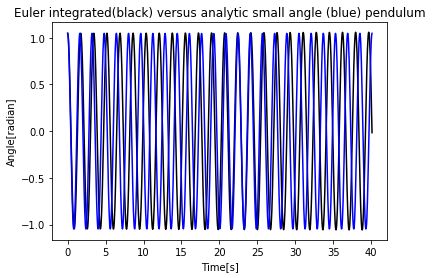

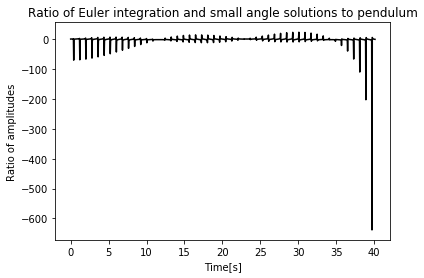

In [8]:
factor=1000
nsteps=nsteps0*factor
t2=np.linspace(0,25*T,nsteps)
x=np.zeros(2*len(t2)).reshape(len(t2),2)
Delta=t2[1]
print('Number of steps =%d and size of steps=%f between 0 and %f s'%(len(t2),Delta,25*T))

# we will use the 0-row for theta, and the 1-row for omega
x[0,1]=0  #initial condition is pendulum at rest
x[0,0]=theta_0 #initial condition 
for i in np.arange(0,len(t2)-1):
    x[i+1,1]=-Delta*g/l*np.sin(x[i,0])+x[i,1]
    x[i+1,0]=Delta*x[i,1]+x[i,0]
y=x[::factor,0]
r=y/y0
plt.figure(figno)
figno+=1
plt.plot(t,y,'k')
plt.plot(t, y0, 'b')
plt.title('Euler integrated(black) versus analytic small angle (blue) pendulum')
plt.xlabel('Time[s]')
plt.ylabel('Angle[radian]')
plt.figure(figno)
figno+=1
plt.plot(t,r,'k')
plt.title('Ratio of Euler integration and small angle solutions to pendulum')
plt.xlabel('Time[s]')
plt.ylabel('Ratio of amplitudes')
plt.show()



Number of steps =10000000 and size of steps=0.000004 between 0 and 40.132232 s


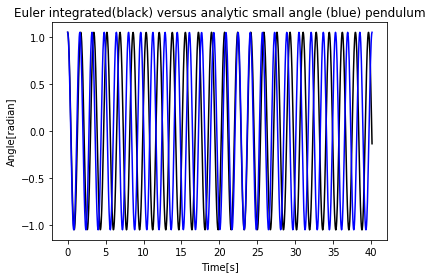

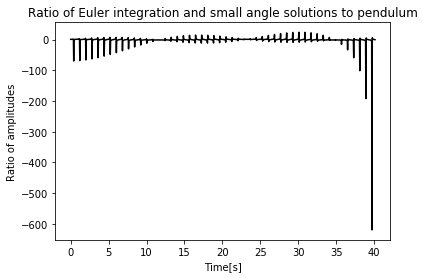

In [9]:
factor=10000
nsteps=nsteps0*factor
t2=np.linspace(0,25*T,nsteps)
x=np.zeros(2*len(t2)).reshape(len(t2),2)
Delta=t2[1]
print('Number of steps =%d and size of steps=%f between 0 and %f s'%(len(t2),Delta,25*T))

# we will use the 0-row for theta, and the 1-row for omega
x[0,1]=0  #initial condition is pendulum at rest
x[0,0]=theta_0 #initial condition 
for i in np.arange(0,len(t2)-1):
    x[i+1,1]=-Delta*g/l*np.sin(x[i,0])+x[i,1]
    x[i+1,0]=Delta*x[i,1]+x[i,0]
y=x[::factor,0]
r=y/y0
plt.figure(figno)
figno+=1
plt.plot(t,y,'k')
plt.plot(t, y0, 'b')
plt.title('Euler integrated(black) versus analytic small angle (blue) pendulum')
plt.xlabel('Time[s]')
plt.ylabel('Angle[radian]')
plt.figure(figno)
figno+=1
plt.plot(t,r,'k')
plt.title('Ratio of Euler integration and small angle solutions to pendulum')
plt.xlabel('Time[s]')
plt.ylabel('Ratio of amplitudes')
plt.show()





Our next step will be more sophisticated- using algorithms that have been worked out more carefully.  But first- some thoughts about an important principle in coding



# Explicit Verification of Code
After figuring out the model-- always!-- think of ways to test the numerical solution.  Testing and debugging code is almost always more than half the work.  Therefore- never give up a chance to do things differently/redundantly- check at the end to make sure that the algorithm is doing what you intended it to do.   Reading it over and over is natural but usually, for most people, not productive.  Looking at the output line by line-- and there are python debuggers that allow you to do that (or cut and paste the code one line at a time into the ipython window) work.  But I always try to explicitly think of tests that we can do inside the project to double check that the code is right.

For this code, what can we do?  
1.  Do the second numerical derivative and compare it to the equation (ie.  substitute back in)
2.  Do time reversal, and see if we come back to the starting point.
3.  Add an explicit calculation of the total energy, and see that it is constant

Why do we do all three rather than just one?



We start with doing the second order numerical derivative:
\begin{equation}
\ddot{\theta}=\frac{g}{l}\sin{\theta}=\frac{1}{h}\left(\frac{\theta(t+h)-\theta(t)}{h}-\frac{\theta(t)-\theta(t-h)}{h}\right)=\frac{\theta(t+h)+\theta(t-h)-2\theta(t)}{h^2}
\end{equation}


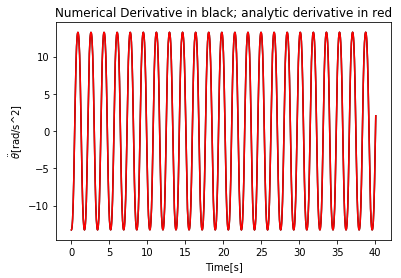

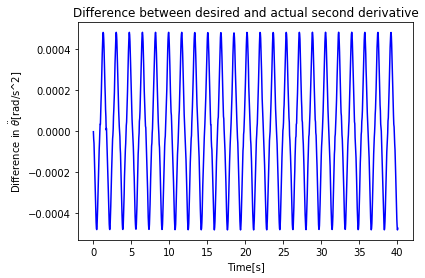

In [10]:
thetaOfT=x[1:-1,0]
thetaTPlusH=x[2:,0]
thetaTMinusH=x[:-2,0]
h=Delta
thetaDotDot=(1/h**2)*(thetaTPlusH+thetaTMinusH-2*thetaOfT)
plt.plot(t2[1:-1:factor],thetaDotDot[::factor],'k')
plt.plot(t2[1:-1:factor],-g/l*np.sin(thetaOfT[1:-1:factor]),'r')
plt.title("Numerical Derivative in black; analytic derivative in red")
plt.xlabel("Time[s]")
plt.ylabel(r'$\ddot\theta$[rad/s^2]')
plt.show()

diff=thetaDotDot[::factor]+g/l*np.sin(thetaOfT[1:-1:factor])
plt.plot(t2[1:-1:factor],diff,'b')
plt.title("Difference between desired and actual second derivative")
plt.xlabel("Time[s]")
plt.ylabel(r'Difference in $\ddot\theta$[rad/s^2]')
plt.show()


This would indicate that our precision is about 0.0004/10 or 4 e-5.  It needs to be a bit better than this because theta is also an output of the calculation- that is we are checking the derivative of $\theta$, which is $\omega$!  

To time reverse we start with theta0, phi0 as the final value, and make the derivative be - the old derivative. 

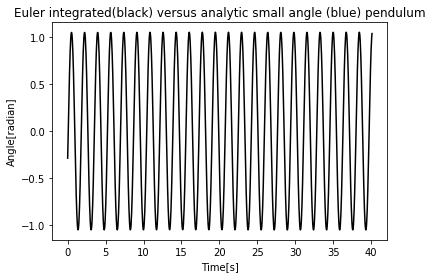

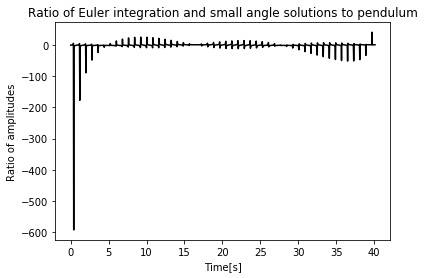

Final theta=1.049294 omega=-0.088980
Original theta0=1.047198 omega0=0.000000
Fractional Difference= 1.3346415152663988e-05


In [11]:
x[0,1]=x[-1,1]  #initial condition is pendulum at rest
x[0,0]=x[-1,0] #initial condition 
for i in np.arange(0,len(t2)-1):
    x[i+1,1]=Delta*g/l*np.sin(x[i,0])+x[i,1]
    x[i+1,0]=-Delta*x[i,1]+x[i,0]
y=x[::factor,0]
r=y/y0
plt.figure(figno)
figno+=1
plt.plot(t,y,'k')
plt.title('Euler integrated(black) versus analytic small angle (blue) pendulum')
plt.xlabel('Time[s]')
plt.ylabel('Angle[radian]')
plt.figure(figno)
figno+=1
plt.plot(t,r,'k')
plt.title('Ratio of Euler integration and small angle solutions to pendulum')
plt.xlabel('Time[s]')
plt.ylabel('Ratio of amplitudes')
plt.show()


print('Final theta=%f omega=%f'%(x[-1,0],x[-1,1]))
print('Original theta0=%f omega0=%f'%(theta_0,0))
print('Fractional Difference=',(x[-1,0]-theta_0)/(50*np.pi))


Notice that this also says we have something like 2e-3.  


The total energy is $E=1/2 mv^2+mgh=1/2ml^2\omega^2-mgl\cos\theta$.


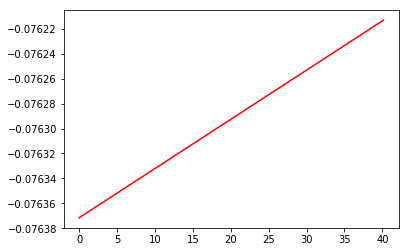

Energy is [-0.07637177 -0.07637158 -0.07637139 -0.07637121 -0.07637102 -0.07637085
 -0.07637068 -0.07637052 -0.07637037 -0.07637023 -0.07637008 -0.07636994
 -0.0763698  -0.07636966 -0.07636952 -0.07636937 -0.07636923 -0.07636909
 -0.07636894 -0.07636878 -0.07636862 -0.07636844 -0.07636826 -0.07636807
 -0.07636788 -0.0763677  -0.07636752 -0.07636735 -0.07636719 -0.07636703
 -0.07636689 -0.07636674 -0.0763666  -0.07636646 -0.07636632 -0.07636617
 -0.07636603 -0.07636589 -0.07636575 -0.0763656  -0.07636545 -0.07636529
 -0.07636512 -0.07636494 -0.07636475 -0.07636456 -0.07636438 -0.07636419
 -0.07636402 -0.07636385 -0.0763637  -0.07636355 -0.0763634  -0.07636326
 -0.07636312 -0.07636297 -0.07636283 -0.07636269 -0.07636255 -0.07636241
 -0.07636226 -0.07636211 -0.07636195 -0.07636179 -0.07636161 -0.07636143
 -0.07636124 -0.07636106 -0.07636087 -0.07636069 -0.07636052 -0.07636036
 -0.07636021 -0.07636006 -0.07635992 -0.07635977 -0.07635963 -0.07635949
 -0.07635935 -0.07635921 -0.07635906 -0.0

In [12]:

m=pend.m
Energy=(0.5*m*l**2)*x[::factor,1]**2-(m*g*l)*np.cos(x[::factor,0])
plt.figure(figno)
figno+=1
plt.plot(t,Energy,'r')
plt.show()
print('Energy is', Energy)



But also note that we already have a physics result-- the large angle pendulum has a longer period than the "small angle" approximation by about 1 cycle in 23- or about 4-5% in this case.  That makes sense because the acceleration is smaller.  Of course, this will depend on the amplitude, and as the amplitude drops the approximation will get closer to reality.    